# WebPage Text Summarization 

**Import Libraries**

In [2]:
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nasr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Fetch Articles from WebPage**

In [46]:
data = url.urlopen('https://www.bbc.com/news/articles/c4nn1p81q59o')
article = data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [47]:
article_text

'Russia has effectively dismantled and replaced the Wagner Group in the year since the mercenaries shocked the world by launching a mutiny against President Vladimir Putin’s government, experts have told the BBC. Yevgeny Prigozhin – the late leader of the paramilitary force – crossed from Ukraine on 23 June 2023 and seized the southern city of Rostov after months of increasing tensions with military leaders in Moscow.His forces then began a brief charge towards the capital, meeting virtually no resistance. The “march for justice”, as Prigozhin called it, came to an abrupt end the following day after he called off the advance.Just two months later, Prigozhin\'s plane crashed and he was killed along with several other senior Wagner members, throwing the group’s future into uncertainty.Dr Sorcha MacLeod, a member of the UN\'s working group on mercenaries and lecturer at the University of Copenhagen, said ex-Wagner troops had fragmented across the Russian state. "[Wagner] may not exist in 

**Text Preprocessing**
Remove square brackets and extra spaces

In [48]:
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

Remove special characters and digits

In [49]:
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

**Tokenize Sentences**

In [50]:
sentence_list = nltk.sent_tokenize(article_text)

**Find Weighted Frequency of Occurrence**

In [51]:
stopwords = nltk.corpus.stopwords.words('english')

In [52]:
word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [53]:
word_frequencies

{'Russia': 10,
 'effectively': 2,
 'dismantled': 1,
 'replaced': 2,
 'Wagner': 28,
 'Group': 5,
 'year': 1,
 'since': 1,
 'mercenaries': 5,
 'shocked': 1,
 'world': 1,
 'launching': 1,
 'mutiny': 4,
 'President': 1,
 'Vladimir': 2,
 'Putin': 4,
 'government': 1,
 'experts': 2,
 'told': 7,
 'BBC': 14,
 'Yevgeny': 2,
 'Prigozhin': 13,
 'late': 2,
 'leader': 1,
 'paramilitary': 2,
 'force': 1,
 'crossed': 1,
 'Ukraine': 6,
 'June': 1,
 'seized': 1,
 'southern': 2,
 'city': 3,
 'Rostov': 1,
 'months': 3,
 'increasing': 2,
 'tensions': 1,
 'military': 2,
 'leaders': 1,
 'Moscow': 7,
 'His': 1,
 'forces': 7,
 'began': 1,
 'brief': 1,
 'charge': 1,
 'towards': 1,
 'capital': 1,
 'meeting': 1,
 'virtually': 1,
 'resistance': 1,
 'The': 7,
 'march': 1,
 'justice': 1,
 'called': 3,
 'came': 3,
 'abrupt': 1,
 'end': 1,
 'following': 1,
 'day': 1,
 'advance': 1,
 'Just': 1,
 'two': 1,
 'later': 2,
 'plane': 1,
 'crashed': 1,
 'killed': 1,
 'along': 1,
 'several': 1,
 'senior': 1,
 'members': 1,
 '

In [54]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [55]:
word_frequencies

{'Russia': 0.35714285714285715,
 'effectively': 0.07142857142857142,
 'dismantled': 0.03571428571428571,
 'replaced': 0.07142857142857142,
 'Wagner': 1.0,
 'Group': 0.17857142857142858,
 'year': 0.03571428571428571,
 'since': 0.03571428571428571,
 'mercenaries': 0.17857142857142858,
 'shocked': 0.03571428571428571,
 'world': 0.03571428571428571,
 'launching': 0.03571428571428571,
 'mutiny': 0.14285714285714285,
 'President': 0.03571428571428571,
 'Vladimir': 0.07142857142857142,
 'Putin': 0.14285714285714285,
 'government': 0.03571428571428571,
 'experts': 0.07142857142857142,
 'told': 0.25,
 'BBC': 0.5,
 'Yevgeny': 0.07142857142857142,
 'Prigozhin': 0.4642857142857143,
 'late': 0.07142857142857142,
 'leader': 0.03571428571428571,
 'paramilitary': 0.07142857142857142,
 'force': 0.03571428571428571,
 'crossed': 0.03571428571428571,
 'Ukraine': 0.21428571428571427,
 'June': 0.03571428571428571,
 'seized': 0.03571428571428571,
 'southern': 0.07142857142857142,
 'city': 0.10714285714285714

**Frequency Distribution**

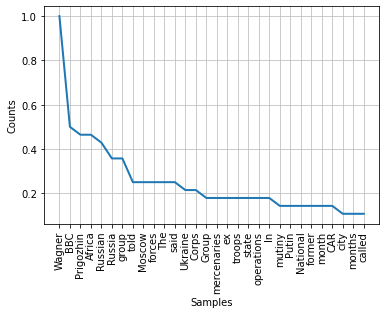

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

**Calculate Sentence Scores**

In [57]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [58]:
sentence_scores

{'"[Wagner] may not exist in exactly the form it did previously, but a version - or even versions - of it continue to exist," she told the BBC.': 0.8214285714285713,
 '"There\'s been this sort of dispersal amongst the Russian state so there is no one overall controller.': 0.4285714285714285,
 '""The Wagner Group was incredibly important geopolitically and economically to Russia, so it was never going to disappear as some people suggested," she added.': 0.9285714285714284,
 'For years, Prigozhin’s forces had been a valuable and deniable tool for Russian operations across Africa and Syria.': 0.6428571428571428,
 'He previously oversaw secretive operations specialising in targeting killings and destabilising foreign governments.Experts told the BBC that the Africa Corps has effectively replaced Wagner in West Africa.': 0.9285714285714284,
 'BBC Russian reported that only in the Central African Republic (CAR) is Wagner still operating in any shadow of its former shape, allegedly controlled

**Extract Output Summary**

In [59]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [60]:
summary

'""The Wagner Group was incredibly important geopolitically and economically to Russia, so it was never going to disappear as some people suggested," she added. He previously oversaw secretive operations specialising in targeting killings and destabilising foreign governments.Experts told the BBC that the Africa Corps has effectively replaced Wagner in West Africa. "[Wagner] may not exist in exactly the form it did previously, but a version - or even versions - of it continue to exist," she told the BBC. Dan Storyev of the OVD-Info monitoring group told the BBC that Prigozhin\'s legacy mostly lay with those aligned with the Kremlin. For years, Prigozhin’s forces had been a valuable and deniable tool for Russian operations across Africa and Syria. BBC Russian reported that only in the Central African Republic (CAR) is Wagner still operating in any shadow of its former shape, allegedly controlled by Prigozhin’s son Pavel. Despite the threat posed by Prigozhin\'s mutiny, Sunday\'s anniver